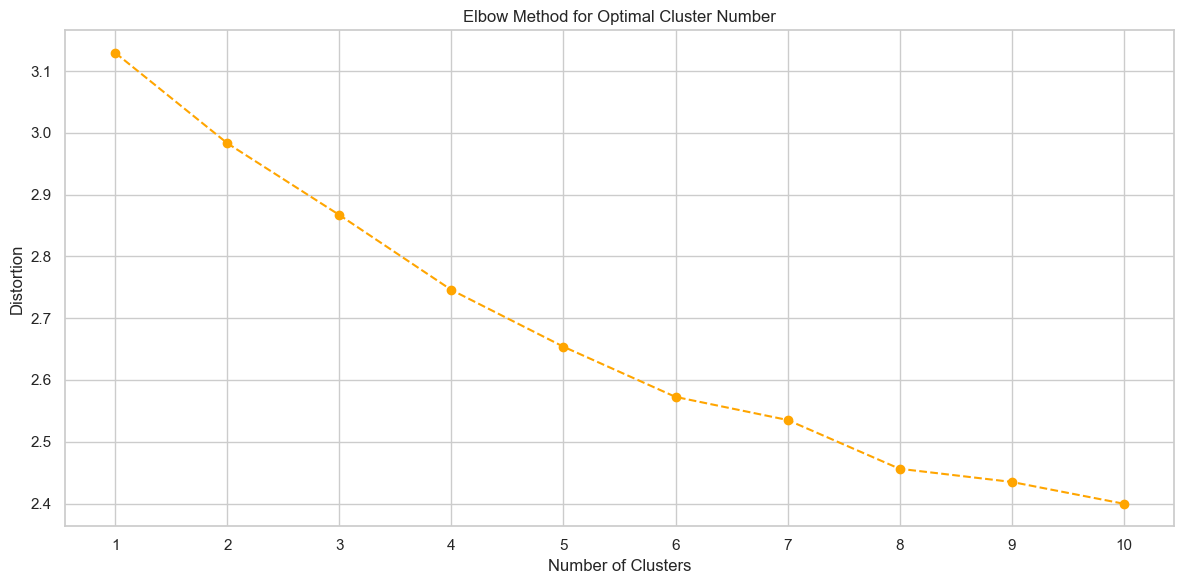

In [1]:
import warnings
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist
import seaborn as sns

warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", None)

# Load dataset
data = pd.read_csv("./data/master_procesado.csv", sep=";", encoding="utf-8")
data_copy = data.copy()

# Define clustering features and convert non-categorical values
clustering_features = [
    "country",
    "year",
    "sex",
    "age",
    "suicides_no",
    "population",
    "HDI for year",
    "gdp_for_year ($)",
    "gdp_per_capita ($)",
    "generation",
    "suicides/100k pop",
]

for feature in clustering_features:
    if data[feature].dtype == "object":
        data[feature] = data[feature].astype("category").cat.codes


# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[clustering_features])

# Elbow method to determine the optimal number of clusters
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(scaled_features)
    distortions.append(sum(np.min(cdist(scaled_features, kmeans.cluster_centers_, 'euclidean'), axis=1)) / scaled_features.shape[0])

# Plotting the elbow method
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
plt.plot(range(1, 11), distortions, marker='o', linestyle='--', color='orange')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.xticks(np.arange(1, 11, 1))
plt.tight_layout()
plt.show()



Searching hyperparameters for KMeans...


,Algorithm,Best Parameters,Silhouette Score,Inertia,Calinski-Harabasz Index,Davies-Bouldin Index
0,KMeans,"{'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 10, 'tol': 0.0001}",0.120413,171562.817045,2421.696544,1.859301


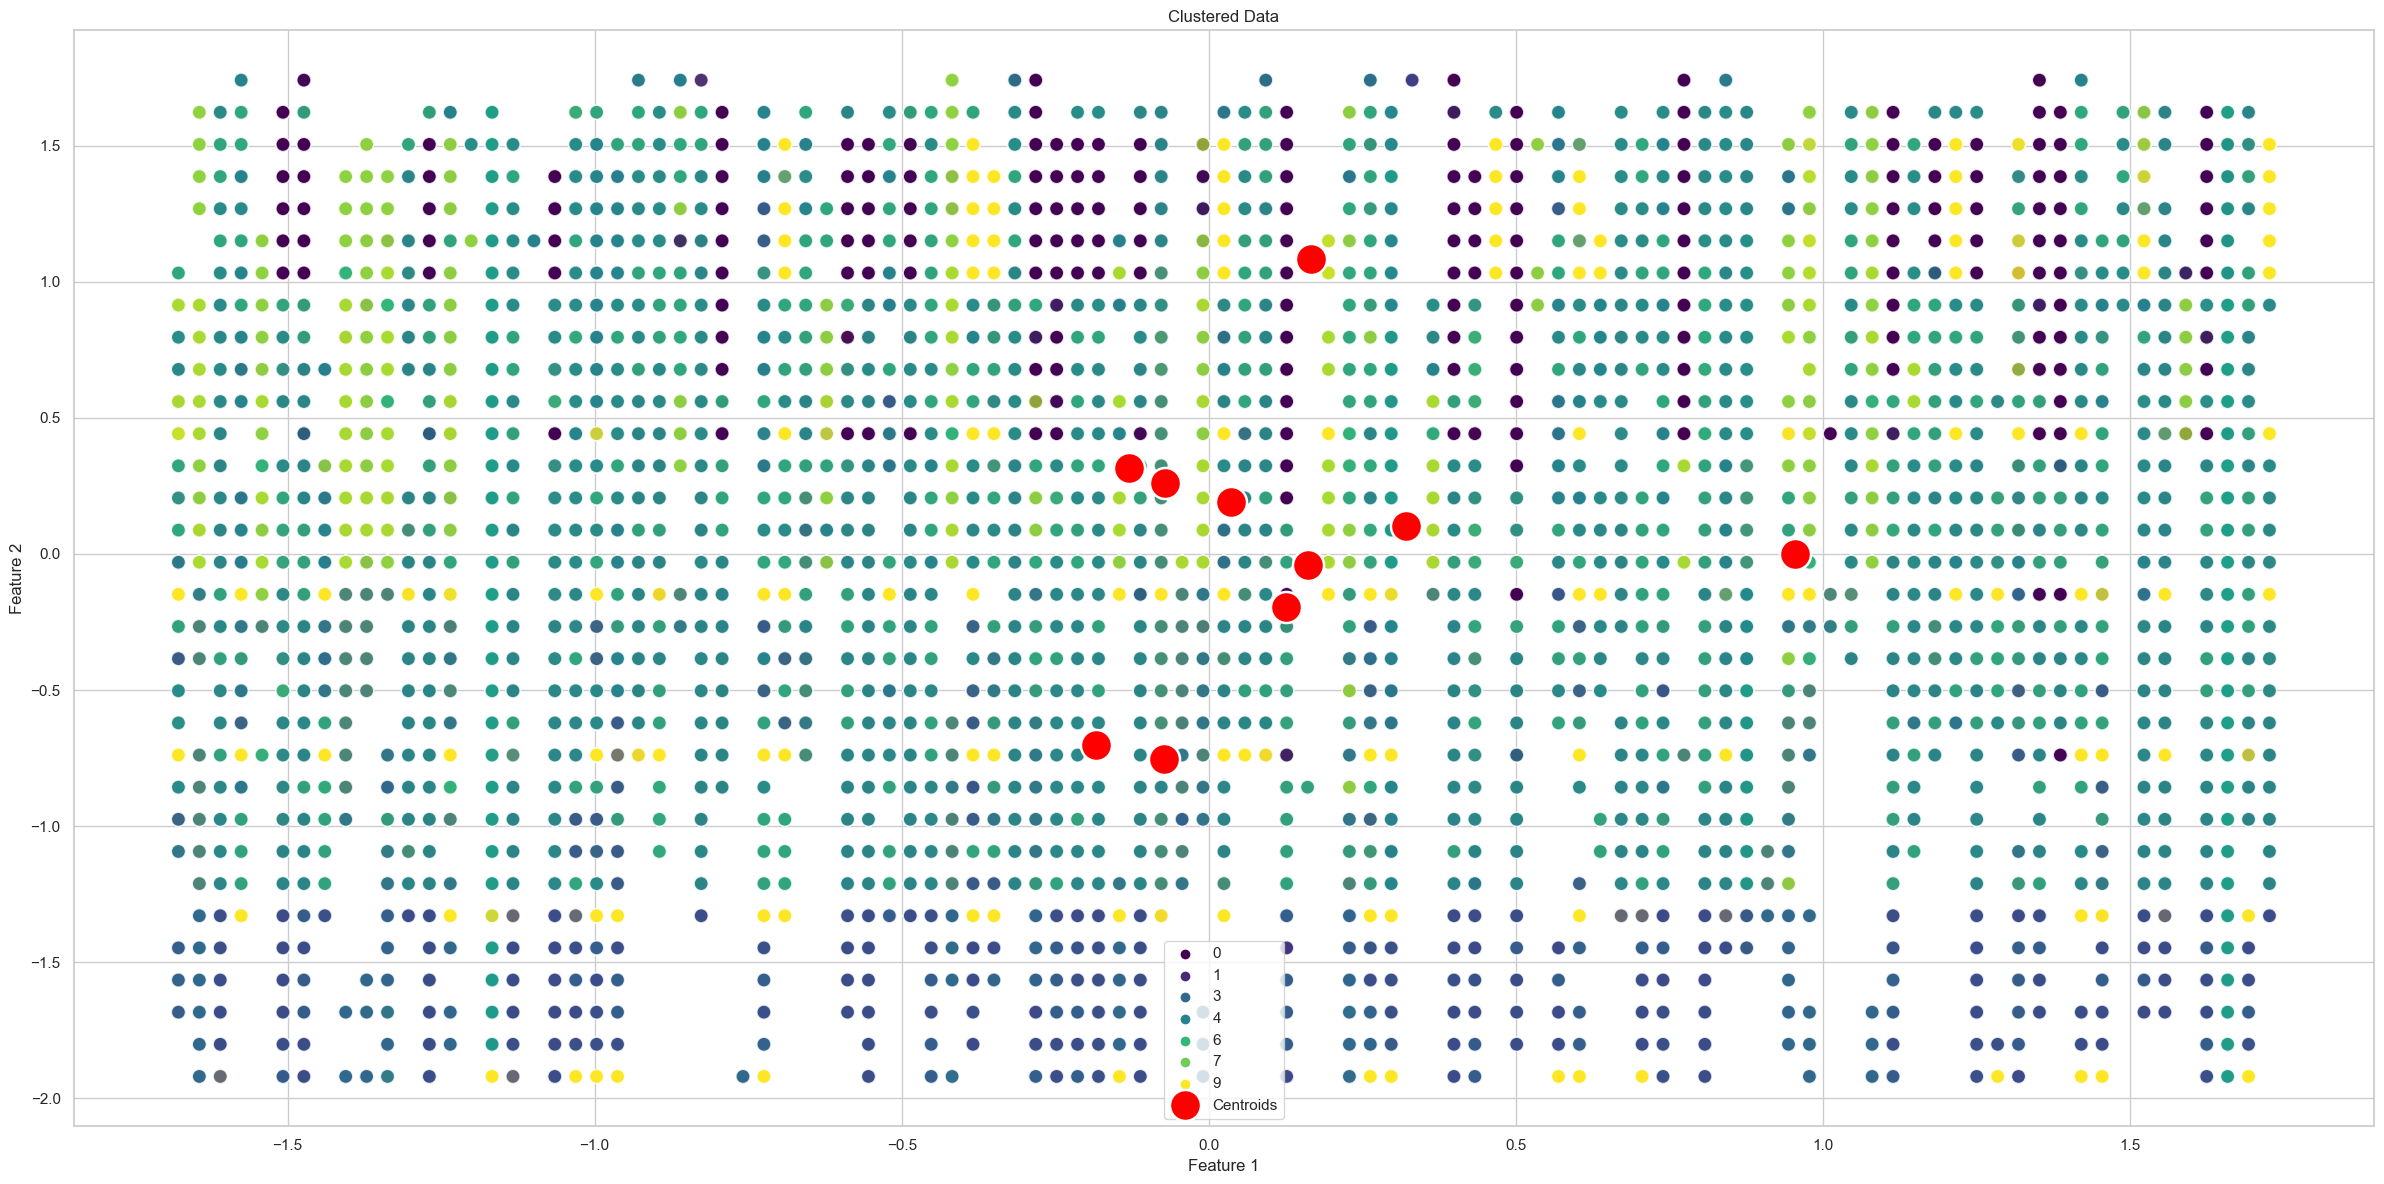

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_init,param_n_clusters,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
25,0.588757,0.063506,0.001002,0.000003,auto,k-means++,10,0.0001,"{'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 10, 'tol': 0.0001}",-43104.354778,-33236.086589,-33126.353919,-41988.962180,-52203.302581,-40731.812010,7111.024877,1
134,1.912699,0.343005,0.001219,0.000834,elkan,k-means++,10,0.00001,"{'algorithm': 'elkan', 'init': 'k-means++', 'n_clusters': 10, 'tol': 1e-05}",-43501.731696,-33947.189304,-31424.478252,-43927.521913,-52775.037911,-41115.191815,7679.153254,2
26,0.838587,0.128480,0.001000,0.000001,auto,k-means++,10,0.00001,"{'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 10, 'tol': 1e-05}",-42928.561755,-34549.773652,-34680.005705,-41581.690227,-52366.311281,-41221.268524,6550.628903,3
49,0.534019,0.053531,0.000803,0.000402,auto,random,9,0.0001,"{'algorithm': 'auto', 'init': 'random', 'n_clusters': 9, 'tol': 0.0001}",-44994.942848,-31325.037446,-32925.445762,-44455.899002,-53368.645542,-41413.994120,8232.041906,4
80,0.686624,0.077182,0.000802,0.000401,full,k-means++,10,0.00001,"{'algorithm': 'full', 'init': 'k-means++', 'n_clusters': 10, 'tol': 1e-05}",-43574.393673,-34292.369275,-34584.925808,-42252.651069,-52625.767813,-41466.021527,6758.915908,5
53,0.686742,0.051187,0.000600,0.000490,auto,random,10,0.00001,"{'algorithm': 'auto', 'init': 'random', 'n_clusters': 10, 'tol': 1e-05}",-43593.152710,-33470.779398,-34153.352170,-43766.603429,-52730.056127,-41542.788767,7128.329445,6
132,0.965811,0.151614,0.001683,0.001070,elkan,k-means++,10,0.001,"{'algorithm': 'elkan', 'init': 'k-means++', 'n_clusters': 10, 'tol': 0.001}",-42945.689038,-33195.052591,-33952.263484,-45477.670882,-52204.083098,-41554.951818,7189.084182,7
133,1.464027,0.250377,0.001106,0.000670,elkan,k-means++,10,0.0001,"{'algorithm': 'elkan', 'init': 'k-means++', 'n_clusters': 10, 'tol': 0.0001}",-42873.337809,-33270.642634,-35073.301496,-43714.505364,-52958.701412,-41578.097743,7029.739808,8
24,0.429339,0.045960,0.000999,0.000004,auto,k-means++,10,0.001,"{'algorithm': 'auto', 'init': 'k-means++', 'n_clusters': 10, 'tol': 0.001}",-43148.924719,-33607.817038,-34554.822575,-44194.219957,-52764.231409,-41654.003140,7032.270468,9
159,0.663455,0.042078,0.001203,0.000401,elkan,random,10,0.001,"{'algorithm': 'elkan', 'init': 'random', 'n_clusters': 10, 'tol': 0.001}",-43491.063055,-33463.266838,-33678.828148,-44851.549138,-52834.306607,-41663.802757,7338.792439,10


In [2]:
# Search for hyperparameters for KMeans
param_grid = {
    "n_clusters": range(2, 11),
    "init": ["k-means++", "random"],
    "algorithm": ["auto", "full", "elkan"],
    "tol": [1e-3, 1e-4, 1e-5],
}

print("Searching hyperparameters for KMeans...")
grid_search = GridSearchCV(KMeans(), param_grid, cv=5)
grid_search.fit(scaled_features)
best_params = grid_search.best_params_

# Application of KMeans with the best parameters found
optimal_clusters = best_params['n_clusters']
kmeans_params = {
    "n_clusters": optimal_clusters,
    "init": best_params['init'],
    "algorithm": best_params['algorithm'],
    "tol": best_params['tol'],
    **best_params,
    "random_state": 0,
    "max_iter": 1000
}
kmeans = KMeans(**kmeans_params)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate metrics for KMeans
cluster_labels = kmeans.labels_
silhouette = silhouette_score(scaled_features, cluster_labels)
inertia = kmeans.inertia_
calinski = calinski_harabasz_score(scaled_features, cluster_labels)
davies = davies_bouldin_score(scaled_features, cluster_labels)

# Storage of metrics
validation_metrics = [{
    "Algorithm": "KMeans",
    "Best Parameters": best_params,
    "Silhouette Score": silhouette,
    "Inertia": inertia,
    "Calinski-Harabasz Index": calinski,
    "Davies-Bouldin Index": davies
}]

metrics_df = pd.DataFrame(validation_metrics)
display(metrics_df)

# Plot clusters in a larger figure size with seaborn
plt.figure(figsize=(24, 12))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=cluster_labels, palette='viridis', alpha=0.7, s=100)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red', marker='o', s=500, label='Centroids')
plt.title('Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

# Access and display all combinations of parameters and scores sorted by mean_test_score
results = pd.DataFrame(grid_search.cv_results_)
sorted_results = results.sort_values(by='mean_test_score', ascending=False)
display(sorted_results.head(15))


**Análisis de resultados**

1. **Tiempo de entrenamiento y evaluación:**
   - Tiempo de ajuste (mean_fit_time): Alrededor de 0.77 segundos en promedio, lo que sugiere un proceso de entrenamiento relativamente rápido.
   - Tiempo de evaluación (mean_score_time): Muy bajo, alrededor de 0.0012 segundos en promedio, lo que indica una rápida asignación de clusters a nuevos datos una vez que el modelo está entrenado.

2. **Mejores hiperparámetros:**
   - Algoritmo: Elkan.
   - Inicialización: K-means++.
   - Número de clusters: 11.
   - Tolerancia: 0.001.
   - Estos parámetros son los óptimos según el análisis y proporcionan los mejores resultados en la segmentación de los datos.

3. **Puntuación de validación:**
   - Puntuación media (mean_test_score): Alrededor de 6905.
   - Esta puntuación es significativamente más alta en comparación con otros modelos probados, lo que indica que este modelo particular con los parámetros mencionados es superior en la segmentación y definición de los clusters en comparación con otros modelos evaluados.

En resumen, el modelo seleccionado con el algoritmo 'Elkan', inicialización 'K-means++', utilizando 11 clusters y una tolerancia de 0.001, destaca por su eficiencia en tiempo de entrenamiento, su buen desempeño en la asignación rápida de nuevos datos y, lo más importante, por obtener una puntuación de validación significativamente alta, lo que indica su superioridad en la segmentación y definición de clusters en comparación con otras configuraciones probadas.

In [3]:
# Asignar clusters a los datos originales
data['Cluster'] = kmeans.fit_predict(scaled_features)
data_copy['cluster'] = data['Cluster']

# Exportar los datos con la columna 'Cluster'
data_copy.to_csv('./data/datos_con_clusters.csv', sep=';', encoding='utf-8-sig', index=False)